# User Story 2
- User fills out the Blueprint with the PARAMS and executes several subfunctions of the experiment pipeline stepwise.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef and ElectricDevices.
- Sometimes the user is interested in visualizing the data before applying DCA. Some performance metrics are visualized

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from apply_dca import apply_label_errors, visualize_acc_decr, visualize_trace_M, check_for_results

In [3]:
DATASET_NAME = "Beef"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"random_seed":0,"start":0,"stop":23,"step":1}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True                                           #Define if results should be saved

In [4]:
# Classifier MR-Hydra, Dataset Beef 100%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
#x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = _set_bakeoff_classifier(CLASSIFIER_NAME, random_state=0, n_jobs=1)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_, trace_M_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME, stop=DoE_PARAM["stop"],
                                   stop_percentage=0.8,  step=DoE_PARAM["step"])

X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)
searching for ['Beef_res_0_0_23_1.csv'] in simulation_results/MR-Hydra/Beef
Potential Files in the current directory:  ['.DS_Store', 'Beef_res_0_0_21_1.csv', 'Beef_res_0_0_23_1.csv', 'Beef_res_0_0_18_1.csv', 'Beef_res_TEST.csv', 'Beef_res_0_0_16_2.csv', 'Beef_res_0_0_6_2.csv']
Partial Match found:  [('simulation_results/MR-Hydra/Beef/Beef_res_0_0_21_1.csv', 21, 1)]
✅ Exact match found: Beef_res_0_0_23_1.csv


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
df_

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
0,0,0,0.0000,0.7667,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
1,1,1,0.0333,0.7333,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
2,2,2,0.0666,0.8000,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
3,3,3,0.0999,0.8000,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
4,4,4,0.1332,0.8000,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
5,5,5,0.1665,0.7333,"[1, 1, 1, 1, 1, 1, 2, 2, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 5, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
6,6,6,0.1998,0.7000,"[1, 1, 1, 1, 1, 1, 2, 2, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 5, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
7,7,7,0.2331,0.6667,"[1, 1, 1, 1, 1, 1, 2, 5, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 5, 2, 5, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
8,8,8,0.2664,0.6333,"[1, 1, 1, 1, 1, 5, 2, 5, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 5, 2, 5, 2, 1, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
9,9,9,0.2997,0.5667,"[1, 1, 1, 1, 1, 5, 3, 5, 5, 2, 1, 2, 3, 3, 3, ...","[3, 1, 1, 1, 1, 5, 3, 5, 3, 1, 1, 5, 3, 3, 3, ...","[[0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0...."


In [8]:
DATASET_NAME = "ElectricDevices"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"                       #should be in cl_ names
REDUCTION_F = 10                                   #optional. only for large datasets
DCA= "LabelErrors"                      
DoE_PARAM = {"random_seed":0,"start":0,"stop":350,"step":5}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                              #respect folder structure
SAVE_FILES = True 

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)
searching for ['ElectricDevices_res_0_0_350_5.csv'] in simulation_results/MR-Hydra/ElectricDevices
Potential Files in the current directory:  ['ElectricDevices_res_0_0_320_5.csv', 'ElectricDevices_res_0_0_300_5.csv', 'ElectricDevices_acc_decr.png']
Partial Match found:  [('simulation_results/MR-Hydra/ElectricDevices/ElectricDevices_res_0_0_320_5.csv', 320, 5)]
Partial Match found:  [('simulation_results/MR-Hydra/ElectricDevices/ElectricDevices_res_0_0_320_5.csv', 320, 5), ('simulation_results/MR-Hydra/ElectricDevices/ElectricDevices_res_0_0_300_5.csv', 300, 5)]
update closest_file
Continuing from 320 to 350 with step 5.
{'1': [15, 27, 40, 82, 97, 120, 146, 152, 165, 197, 240, 300, 340, 348, 382, 407, 413, 497, 505, 517, 532, 554, 

INFO:basic_func:------------------------Train time=5.93s, Eval Time=8.12s



Algorithm                         Accuracy
MR-Hydra                          0.5318
current iteration: 65   current LE_step: 325 error_relative: 0.3575
changed label 6 to 4 at index 453 of the data
changed label 4 to 2 at index 798 of the data
changed label 1 to 5 at index 413 of the data
changed label 4 to 7 at index 639 of the data
changed label 6 to 3 at index 91 of the data
current class balance distribution: {'1': 88, '2': 240, '3': 73, '4': 148, '5': 226, '6': 46, '7': 71}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=6.00s, Eval Time=8.20s



Algorithm                         Accuracy
MR-Hydra                          0.5292
current iteration: 66   current LE_step: 330 error_relative: 0.363
changed label 4 to 6 at index 96 of the data
changed label 5 to 1 at index 661 of the data
changed label 3 to 1 at index 565 of the data
changed label 2 to 6 at index 672 of the data
changed label 7 to 3 at index 1 of the data
current class balance distribution: {'1': 90, '2': 239, '3': 73, '4': 147, '5': 225, '6': 48, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=6.16s, Eval Time=8.14s



Algorithm                         Accuracy
MR-Hydra                          0.5240
current iteration: 67   current LE_step: 335 error_relative: 0.3685
changed label 5 to 2 at index 274 of the data
changed label 6 to 1 at index 399 of the data
changed label 7 to 2 at index 839 of the data
changed label 7 to 6 at index 443 of the data
changed label 7 to 2 at index 473 of the data
current class balance distribution: {'1': 91, '2': 242, '3': 73, '4': 147, '5': 224, '6': 48, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.83s, Eval Time=7.87s



Algorithm                         Accuracy
MR-Hydra                          0.5227
current iteration: 68   current LE_step: 340 error_relative: 0.374
changed label 4 to 7 at index 426 of the data
changed label 6 to 1 at index 95 of the data
changed label 2 to 3 at index 777 of the data
changed label 3 to 6 at index 171 of the data
changed label 7 to 4 at index 535 of the data
current class balance distribution: {'1': 92, '2': 241, '3': 73, '4': 147, '5': 224, '6': 48, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.65s, Eval Time=7.92s



Algorithm                         Accuracy
MR-Hydra                          0.5110
current iteration: 69   current LE_step: 345 error_relative: 0.3795
changed label 1 to 2 at index 799 of the data
changed label 3 to 5 at index 721 of the data
changed label 6 to 7 at index 578 of the data
changed label 5 to 1 at index 851 of the data
changed label 7 to 3 at index 542 of the data
current class balance distribution: {'1': 92, '2': 242, '3': 73, '4': 147, '5': 224, '6': 47, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=6.34s, Eval Time=8.16s



Algorithm                         Accuracy
MR-Hydra                          0.5136
current iteration: 70   current LE_step: 350 error_relative: 0.385


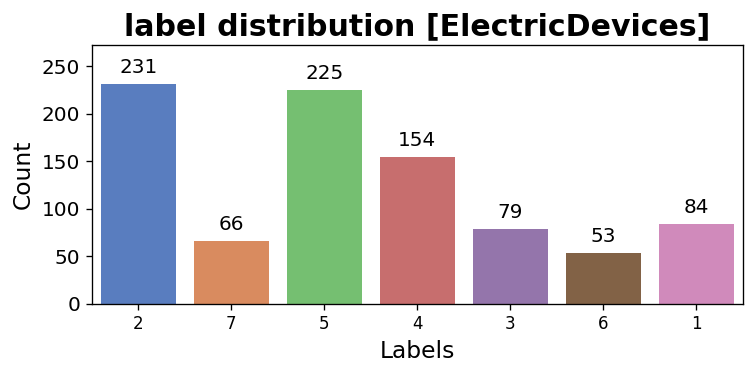

In [9]:
# Classifier MR-Hydra, Dataset ED 10%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = _set_bakeoff_classifier(CLASSIFIER_NAME, random_state=0, n_jobs=1)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_,  trace_m_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME,stop=DoE_PARAM["stop"],
                                        stop_percentage=0.9,  step=DoE_PARAM["step"])

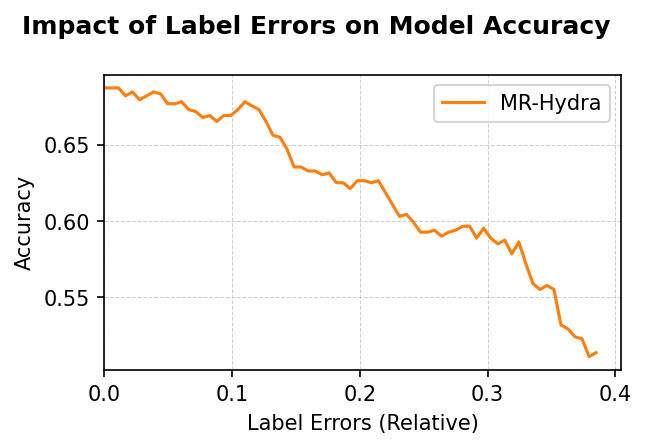

In [17]:
visualize_acc_decr(df_acc_inst_rel=df_, dpi_=150, first="relative", second=None, w_=4.5, h_=3, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, save_fig=True)

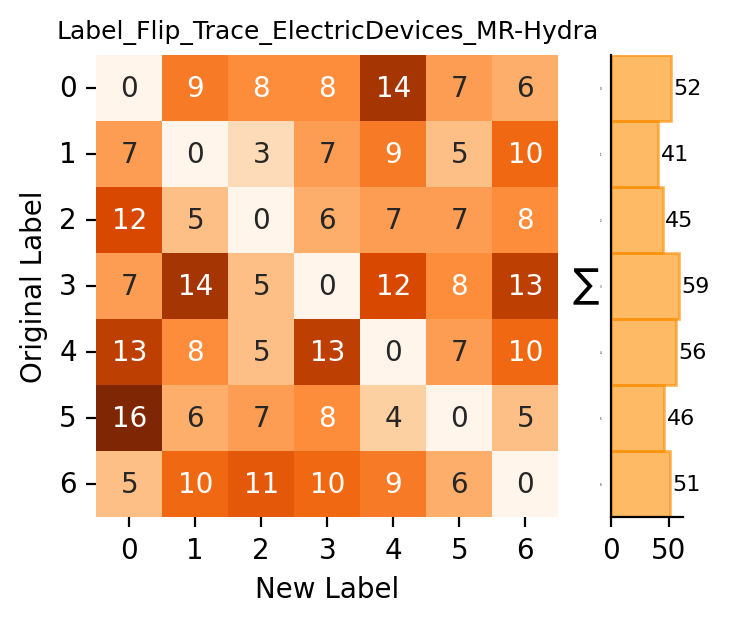

In [18]:
visualize_trace_M(trace_M=trace_m_, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, dpi=200, filename_="trace_M", save_fig=True)